# STEP 1 

In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def asciiDC3 (seq) : 
    asc=[]
    for i in seq : 
        asc.append(ord(i))
    
    return asc+[0,0,0]

In [3]:
def position1_2 (asc):
    ind1=[]
    ind2=[]
    for k in range(len(asc)-2):
        #attention on a peut etre fait de la merde ici, pas sure du -2
        if k%3==1 :
            ind1.append(k)
        if k%3==2:
            ind2.append(k)
    # dans le cas où T a un nombre d'élément multiple de 3, r12 ne contiendra pas le triplet [0,0,0].
    # Or, la fonction, "removesentinel" retire 1 élément notre suffix table, pour justement se débarrasser de [0,0,0]
    # J'ai donc décider de rajouter artificiellement [0,0,0] dans les cas où il n'est pas déjà là.
    if len(asc)%3==0:
        ind1.append(len(asc)-1-2)
        
    return ind1+ind2

In [50]:
print(len([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0])-3)

18


In [52]:
print(position1_2([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0]))

[1, 4, 7, 10, 13, 16, 2, 5, 8, 11, 14, 17]


In [4]:
def radix (p, t):
    r=[]
    for i in range(len(p)):
        index=p[i]
        r.append([t[index],t[index+1], t[index+2]])
    return r

In [5]:
def sort(array,index, alphabet, columnNumber):
    #print("array")
    #print(array)
    #print("alphabet")
    #print(alphabet)
    if len(array) == 0:
        return array

  # Perform counting sort on each column, starting at the last

    column = columnNumber
    while column>=0: # nous on met "tant que l'indice est supérieur à 3"
        array, index = countingSortByDigit(array,index, alphabet, column)
        column-=1 #change de colonne dans ton tableau

    return array, index

def countingSortByDigit(array, index, alphabet, column):
    """
    ici possibleNumbers= nombre de chiffres possibles. Nous n'avons que 4 nombres (0,97,98,99)
    """

    countIndex = -1
    count = [0] * len(alphabet)
    output = [None] * len(array)
    outputIndex= [0] * len(array)

  # Count frequencies
    for i in range(0, len(array)):
        #print("i "+str(i))
        #print("array[i] "+ str(array[i]))
        #print("column "+str(column))
        
        countIndex = alphabet[array[i][column]]
        count[countIndex] += 1

  # Compute cumulates
    for i in range(1, len(alphabet)):
        count[i] += count[i - 1]

  # Move records
    for i in range(len(array) - 1, -1, -1):
        countIndex = alphabet[array[i][column]]
        count[countIndex] -= 1
        output[count[countIndex]] = array[i]
        outputIndex[count[countIndex]]=index[i]
       
    return output, outputIndex

In [6]:
def ordre(R):
    # nous renovie la liste order du genre (1,2,2,3,4,4,5)  et un booléen indiquant s'il y a répétition
    index=1
    repetition=False
    ordre=[1]
    for i in range(1, len(R)): 
        if R[i-1]==R[i] : 
            ordre.append(index)
            repetition=True
        else : 
            index+=1
            ordre.append(index)
            
    return ordre, repetition
            

In [7]:
def Tprime(ordre, p12, index):
    t=[]
    for p in p12:
        for i in range(len(index)):
            if index[i]==p : 
                t.append(ordre[i])
    return t

In [8]:
def alphabetT(T):
    ### à changer pcq c laid
    dic={}
    a=[]
    for i in range(len(T)):
        a.append(T[i])
    a.sort() ## MDR CE SORT EST A CHANGER SERGIO VA NOUS TUER
    
    for element in a:
        if not (element in dic):
            dic[element]=len(dic)
    return dic

In [9]:
def alphabetR0(R0):
    ### à changer pcq c laid
    dic={}
    a=[]
    for column in range(2):
        for i in range(len(R0)):
            a.append(R0[i][column])
    a.sort() ## MDR CE SORT EST A CHANGER SERGIO VA NOUS TUER
    
    for element in a:
        if not (element in dic):
            dic[element]=len(dic)
    return dic

## Testons nos fonctions sur un string simple

In [10]:
S="abcabcacab"
T=asciiDC3(S)
columnnumber=2
print(T)

[97, 98, 99, 97, 98, 99, 97, 99, 97, 98, 0, 0, 0]


In [11]:
p12=position1_2(T)
print(p12)

[1, 4, 7, 10, 2, 5, 8]


In [12]:
R12=radix(p12, T)
print(R12)

[[98, 99, 97], [98, 99, 97], [99, 97, 98], [0, 0, 0], [99, 97, 98], [99, 97, 99], [97, 98, 0]]


In [13]:
alph=alphabetT(T)
alph

{0: 0, 97: 1, 98: 2, 99: 3}

[1, 4, 7, 10, 2, 5, 8]


In [14]:
Rs12, index12= sort(R12,p12, alph, columnnumber)
print(Rs12)
print(index12)

[[0, 0, 0], [97, 98, 0], [98, 99, 97], [98, 99, 97], [99, 97, 98], [99, 97, 98], [99, 97, 99]]
[10, 8, 1, 4, 7, 2, 5]


In [15]:
order12, boolean =ordre(Rs12)
print(order12)
print(boolean)

[1, 2, 3, 3, 4, 4, 5]
True


In [17]:
alph =alphabetT(T)
alph

coucou


{0: 0, 97: 1, 98: 2, 99: 3}

In [16]:
tprime=Tprime(order12, p12, index12)
print(tprime)

[3, 3, 4, 1, 4, 5, 2]


In [17]:
tprime=tprime+[0,0,0]
tprime

[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]

### On répète les opérations jusqu'à avoir aucun charactère répété dans T⁽n⁾

In [18]:
p12prime=position1_2(tprime)
print(p12prime)
R12prime=radix(p12prime, tprime)
print(R12prime)
alphprime=alphabetT(tprime)
print(alphprime)
Rs12prime, index12prime= sort(R12prime,p12prime, alphprime, columnnumber)
print(Rs12prime)
print(index12prime)
order12prime, boolean =ordre(Rs12prime)
print(order12prime)
print(boolean)

[1, 4, 7, 2, 5]
[[3, 4, 1], [4, 5, 2], [0, 0, 0], [4, 1, 4], [5, 2, 0]]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
[[0, 0, 0], [3, 4, 1], [4, 1, 4], [4, 5, 2], [5, 2, 0]]
[7, 1, 2, 4, 5]
[1, 2, 3, 4, 5]
False


# STEP 2 

In [19]:
import copy

In [20]:
def position0_R0(T, index12):
    #attention T se finit avec trois 0
    position=[]
    R=[]
    for i in range(len(T)-3): #on ne prend pas en compte les trois 0 sentinelle
        if i%3==0:
            position.append(i)
            length_of_R=len(R)
            k=0
            while length_of_R==len(R):
                if i+1<len(T)-3 and index12[k]==i+1:
                    R.append([T[i],k+1])
                if i+1>=len(T)-3 and index12[k]==1:
                    R.append([T[i],1])# car les sentinelles sont forcément les 1ères dans l'ordre alphabétique
                else:
                    k+=1
    return position, R

# Testons notre fonction avec le string T

In [21]:
print(index12prime)
tprime

[7, 1, 2, 4, 5]


[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]

In [45]:
def position0_R0_forloop(T, index12):
    #attention T se finit avec trois 0
    position=[]
    R=[]
    for i in range(len(T)-3): #on ne prend pas en compte les trois 0 sentinelle
        if i%3==0:
            position.append(i)
            for k in range(len(index12)):
                if i+1<len(T)-3 and index12[k]==i+1:
                    R.append([T[i],k+1])
                if i+1>=len(T)-3 and index12[k]==1:
                    R.append([T[i],1])# car les sentinelles sont forcément les 1ères dans l'ordre alphabétique
    return position, R

In [22]:
p0prime, r0prime=position0_R0(tprime, index12prime)
print(p0prime)
print(r0prime)

[0, 3, 6]
[[3, 2], [1, 4], [2, 1]]


# STEP 3

In [23]:
def merge(Tfinal, index_0, index12) : 
    liste=[]
    A=0
    B=0
    while A<len(index_0) and B<len(index12):
        #print("rentre dans le while")
        a=index_0[A]
        b=index12[B]
        if Tfinal[a]!=Tfinal[b] :
            minimum=min(Tfinal[a], Tfinal[b])
            
            if minimum == Tfinal[a]:
                #print("a= "+str(a)+", b= "+str(b)+", on append le "+str(a))
                A+=1
                liste.append(a)
            else: 
                #print("a= "+str(a)+", b= "+str(b)+", on append le "+str(b))
                B+=1
                liste.append(b)

        else :
            if b%3==1 : 
                #print(str(b)+" est congru à 1 modulo 3")
                longueur=len(liste)
                i=0
                while longueur==len(liste):
                    #print("index12")
                    #print(index12)
                    #print("a= "+str(a)+", b= "+str(b))    
                    if a+1==index12[i]:
                        #print(str(a+1)+" apparait en premier dans index12")
                        liste.append(a)
                        A+=1
                    elif b+1==index12[i]:
                        #print(str(b+1)+" apparait en premier dans index12")
                        liste.append(b)

                        B+=1
                    else:
                        i+=1
                    
                    
            elif b%3==2 :
                #print(str(b)+"est congru à 2 modulo 3")
                if Tfinal[a+1]!=Tfinal[b+1] :
                    minimum=min(Tfinal[a], Tfinal[b])
                    if minimum == Tfinal[a]:
                        A+=1
                        liste.append(a)
                    else: 
                        B+=1
                        liste.append(b)

                else:
                    for element in index12:
                        if a+2==element:
                            liste.append(a)
                            A+=1
                        elif b+2==element:
                            liste.append(b)
                            B+=1

        #print("A "+str(A))
        #print("B "+str(B))
        if A==len(index_0):
            for i in range(B, len(index12)):
                liste.append(index12[i])
        if B==len(index12):
            for i in range(A, len(index_0)):
                liste.append(index_0[i])

    return liste

pos_0,R_0=position0_R0(Tfinal, index12)
print(pos_0)
print(R_0)

In [75]:
tprime=tprime+[0,0,0
tprime

[3, 3, 4, 1, 4, 5, 2, 0, 0, 0, 0, 0, 0]

In [ ]:
tprime+[(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((())))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))]

In [100]:
T

[97, 98, 99, 97, 98, 99, 97, 99, 97, 98, 0, 0, 0]

In [24]:
def removesentinel(index):
    return index[1:]

In [25]:
def resumeHigherOrder(index012prime, P12):
    output=[]
    for element in index012prime:
        output.append(P12[element])
        
    return output

### Testons notre fonction avec le string T

In [134]:
Tfinal=[7, 24, 28, 2, 25, 27, 26, 2, 30, 9, 15, 11, 19, 4, 2, 22, 23, 27, 22, 30, 27, 8, 24, 6, 2, 28, 27, 3, 18, 23, 24, 24, 22, 1, 21, 14, 20, 4, 16, 19, 17, 4, 28, 29, 3, 8, 28, 7, 4, 11, 12, 19, 11, 30, 18, 27, 13, 13, 4, 21, 18, 5, 21, 12, 14, 14, 10, 0, 0, 0]

In [135]:
max(Tfinal)

30

In [26]:
alph0prime=alphabetR0(r0prime)
print(alph0prime)

{1: 0, 2: 1, 3: 2, 4: 3}


In [27]:
r0sprime, index0prime= sort(r0prime,p0prime, alph0prime, columnnumber-1)
print(r0sprime)
print(index0prime)

[[1, 4], [2, 1], [3, 2]]
[3, 6, 0]


In [28]:
print(tprime)
print(index0prime)
print(index12prime)

[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]
[3, 6, 0]
[7, 1, 2, 4, 5]


In [29]:
index120prime=merge(tprime, index0prime, index12prime)
index120prime

[7, 3, 6, 0, 1, 2, 4, 5]

def assembleSuffixAray(RecursionLists):
    index12=RecursionLists[1][-1]
    for i in range(len(RecursionLists)-1):
        T=RecursionLists[0][-1-i]
# crée P0
        pos_0,R_0=position0_R0(T)
        print("i "+str(i))
        print("pos_0 "+str(pos_0))
        print("R_0 "+str(R_0))
        print("alphabet ")
        print(alphabetT(T, True))
# trie P
        R_0sorted, index_0=sort(R_0,pos_0,alphabetT(T, True) ,1)
# merge P0 et R0
        index012=merge(T, index_0, index12)
        index012rime=removesentinel(index012)
# préparer la boucle suivante
        if i<len(RecursionLists)-2:
            p12=RecursionLists[2][-2-i] # on prend les positions d'un ordre +1
            index12=resumeHigherOrder(index012prime,p12 )
        
    return index012rime

# Assemblage final

In [30]:
def almost_dc3(T):
    # T est une liste de int

    
    columnNumber=2
    p12=position1_2(T)
    

    r12=radix(p12,T)


    alphabet_T=alphabetT(T)

    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)

    order12,repetition=ordre(r12sorted)

    

    if repetition:

        
        Tprim=Tprime(order12, p12, index12)+[0,0,0]

        index012=almost_dc3(Tprim)


        index12=resumeHigherOrder(index012, p12)


    p0,r0=position0_R0(T, index12)

    alphabet_r0=alphabetR0(r0)

    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)


    order0=ordre(r0sorted)
    
    temp=merge(T, index0, index12)

    index012=removesentinel(merge(T, index0, index12))


    return index012
   
    
    

In [31]:
def almost_dc3_debugg(T):
    # T est une liste de int

    
    columnNumber=2
    p12=position1_2(T)
    
    print("p12")
    print(p12)
    print("taille de p12 avant récursion")
    print(len(p12))
    print("\n")
    
    r12=radix(p12,T)
    print("r12")
    print(r12)
    print("\n")

    alphabet_T=alphabetT(T)

    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)
    print("index12")
    print(index12)
    print("taille de index12 avant récursion")
    print(len(index12))
    print("\n")
    
    order12,repetition=ordre(r12sorted)
    print("order12")
    print(order12)
    print("entre-t-on dans la boucle de répétition?")
    print(repetition)
    print("\n")
    

    if repetition:

        
        Tprim=Tprime(order12, p12, index12)+[0,0,0]
        print("tprime")
        print(Tprim)
        print("taille de tprime")
        print(len(Tprim))
        print("\n")
        
        index012=almost_dc3(Tprim)
        print("index012")
        print(index012)
        print("taille de index012")
        print(len(index012))
        print("\n")

        index12=resumeHigherOrder(index012, p12)
        print("resume higher order index12")
        print(index12)
        print("taille de index12 après retour à taille initiale")
        print(len(index12))
        print("\n")

    p0,r0=position0_R0(T, index12)
    print("p0")
    print(p0)
    print("taille de p0")
    print(len(p0))
    print("\n")
    
    print("r0")
    print(r0)
    print("\n")
    alphabet_r0=alphabetR0(r0)

    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)
    print("index0")
    print(index0)
    print("taille de index0")
    print(len(index0))
    print("\n")

    order0=ordre(r0sorted)
    
    temp=merge(T, index0, index12)
    print("taille de temp")
    print(len(temp))
    
    index012=removesentinel(merge(T, index0, index12))
    print("taille après la fonction removesentinel")
    print(len(index012))
    print("\n")

    return index012
   
    
    

In [33]:
cProfile.run("almost_dc3(T)", "dc3_stats")
p = pstats.Stats("dc3_stats")
p.sort_stats("cumulative").print_stats()

Mon Oct 30 22:31:24 2023    dc3_stats

         485 function calls (484 primitive calls) in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
      2/1    0.000    0.000    0.000    0.000 /tmp/ipykernel_64783/332991931.py:1(almost_dc3)
        4    0.000    0.000    0.000    0.000 /tmp/ipykernel_64783/1511205218.py:1(sort)
       10    0.000    0.000    0.000    0.000 /tmp/ipykernel_64783/1511205218.py:18(countingSortByDigit)
        4    0.000    0.000    0.000    0.000 /tmp/ipykernel_64783/2274843302.py:1(merge)
        2    0.000    0.000    0.000    0.000 /tmp/ipykernel_64783/2215782786.py:1(position0_R0)
        2    0.000    0.000    0.000    0.000 /tmp/ipykernel_64783/150808864.py:1(alphabetT)
      286    0.000    0.000    0.000    0.000 {built-in method builtins.len}

### Testons notre fonction avec le string T

In [36]:
almost_dc3(T)

[8, 0, 3, 6, 9, 1, 4, 7, 2, 5]

In [37]:
print(len([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0])-3)

18


In [38]:
print(position1_2([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0]))

[1, 4, 7, 10, 13, 16, 18, 2, 5, 8, 11, 14, 17]


In [39]:
print(position0_R0([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0],[17, 5, 4, 8, 2, 7, 10, 14, 13, 11, 16, 1]))

([0, 3, 6, 9, 12, 15], [[2, 12], [5, 3], [12, 6], [8, 7], [14, 9], [16, 11]])


## Test avec biopython 


In [40]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
from Bio import SeqIO
genome=[]
nucleotide_genome=0
for seq_record in SeqIO.parse("/home/azarkua/Documents/2023-2024/omiques2/developement/omique2/genome.fna", "fasta"):
    genome.append(seq_record)
    nucleotide_genome+=len(seq_record.seq)
print(genome[13:])

[SeqRecord(seq=Seq('tgaaccctaaaccctaaaccctaaaccctaaacccctaaaccctaaaccctgaa...gtt'), id='NC_037283.1', name='NC_037283.1', description='NC_037283.1 Plasmodium falciparum 3D7 genome assembly, chromosome: 14', dbxrefs=[]), SeqRecord(seq=Seq('ATGATAAAATTTTTAAAACCTAAAATAAAAATATTAAAAAAATTAAATATACCT...ATT'), id='NC_036769.1', name='NC_036769.1', description='NC_036769.1 Plasmodium falciparum strain 3D7, apicoplast', dbxrefs=[])]


In [42]:
reads=[]
nucleotide_reads=0
for seq_record in SeqIO.parse("/home/azarkua/Documents/2023-2024/omiques2/developement/omique2/reads.fq", "fastq"):
    reads.append(seq_record)
    nucleotide_reads+=len(seq_record.seq)
    #if len(seq_record.seq)!= 100:
    #    print("False")
print(reads[:1])

[SeqRecord(seq=Seq('TTTCCTTTTTAAGCGTTTTATTTTTTAATAAAAAAAATATAGTATTATATAGTA...TAA'), id='NC_004325.2-100000', name='NC_004325.2-100000', description='NC_004325.2-100000', dbxrefs=[])]


In [43]:
temp=genome[1].seq.upper()
print(len(temp)//4)
temp[50:60]

236775


Seq('CCCTGAACCC')

Pour l'instant, notre code met environ 2min d'attente pour faire la suffix table de 25 000 nucléotides.

In [52]:
T=asciiDC3(temp[:25000])
#print(T)

In [53]:
suffix_array=almost_dc3(T)
print(suffix_array[:100])
#print(timemeasuring)

[23151, 23229, 23152, 23230, 23231, 23154, 23153, 23157, 23232, 23155, 23158, 23233, 23234, 23235, 23156, 23238, 23159, 23160, 23236, 23239, 23237, 23241, 23240, 23163, 23321, 23166, 23322, 24605, 23161, 23162, 23268, 23242, 23164, 23267, 23244, 23243, 24606, 23165, 23391, 23167, 23323, 23324, 23325, 23269, 23245, 24607, 23270, 23220, 23246, 23247, 23168, 23169, 8044, 23392, 23350, 24404, 23271, 23326, 24608, 24786, 6665, 23370, 8045, 23121, 23221, 23351, 23295, 23393, 24405, 23327, 24609, 22438, 23248, 24777, 8046, 23328, 23994, 9234, 8019, 8991, 6642, 23274, 23202, 7893, 23373, 22410, 24408, 23193, 7695, 7650, 6669, 8946, 6714, 7758, 6666, 23170, 23272, 23222, 23352, 9233]


## Mesurer le temps que prend notre fonction

In [32]:
import pstats
import cProfile

In [54]:
cProfile.run("almost_dc3(T)", "dc3_stats")
p = pstats.Stats("dc3_stats")
p.sort_stats("cumulative").print_stats()

Mon Oct 30 22:35:46 2023    dc3_stats

         377935468 function calls (377935465 primitive calls) in 121.999 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  121.999  121.999 {built-in method builtins.exec}
        1    0.002    0.002  121.999  121.999 <string>:1(<module>)
      4/1    0.005    0.001  121.996  121.996 /tmp/ipykernel_64783/332991931.py:1(almost_dc3)
        4   62.218   15.555   79.242   19.810 /tmp/ipykernel_64783/2215782786.py:1(position0_R0)
        3   27.046    9.015   27.053    9.018 /tmp/ipykernel_64783/3942343667.py:1(Tprime)
377370643   18.089    0.000   18.089    0.000 {built-in method builtins.len}
        8   14.430    1.804   15.512    1.939 /tmp/ipykernel_64783/2274843302.py:1(merge)
        8    0.001    0.000    0.084    0.010 /tmp/ipykernel_64783/1511205218.py:1(sort)
       20    0.083    0.004    0.083    0.004 /tmp/ipykernel_64783/1511205218.py:18(counting

to do list:  
-rendre position0_R0 plus efficace    
-rendre Tprime plus efficace  
-essayer d'utiliser moins de len  
-rendre merge plus efficace  

### Première tentative de mesure du temps que prend dc3 (qui ne marche pas)

Mais j'y ai investi trop de temps pour le supprimer

i assume that when a function ends, an other function begins

In [34]:
      #time variables
t0=[] #starting times of every recursion of almost_dc3
timep12=[] 
timer12=[]
timealphabet=[]
timesort=[]
timeorder=[]
trep=[]
timeTprime=[]
tBeforeHigherOrder=[]
timeresumeHigherOrder=[]
tBeforeP0=[]
timeposition0_R0=[]
timealphabetR0=[]
    
timelist=[t0,timep12,timer12,timealphabet,timesort,timeorder,trep,timeTprime,tBeforeHigherOrder,timeresumeHigherOrder,tBeforeP0,timeposition0_R0,timealphabetR0]


In [35]:
def almost_dc3_time_measuring(T):
    
    t0.append(time.time())
    # T est une liste de int
    columnNumber=2
    p12=position1_2(T)
    
    print("p12")
    print(p12)
    print("taille de p12 avant récursion")
    print(len(p12))
    
    timep12.append(time.time()-t0[-1])
    
    r12=radix(p12,T)
    timer12.append(time.time()-timep12[-1])
    
    alphabet_T=alphabetT(T)
    timealphabet.append(time.time()-timer12[-1])
    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)
    timesort.append(time.time()-timealphabet[-1])
    
    order12,repetition=ordre(r12sorted)
    timeorder.append(time.time()-timesort[-1])
    
    if repetition:
        trep.append(time.time())
        
        Tprim=Tprime(order12, p12, index12)+[0,0,0]
        timeTprime.append(time.time()-trep[-1])
        
        index012=almost_dc3(Tprim)
        
        tBeforeHigherOrder.append(time.time())
        index12=resumeHigherOrder(index012, p12)
        timeresumeHigherOrder.append(time.time()-tBeforeHigherOrder[-1])
    
    print("taille de p12 après récursion")
    print(len(p12))
    
    tBeforeP0.append(time.time())
    p0,r0=position0_R0(T, index12)
    timeposition0_R0.append(time.time()-tBeforeP0[-1])
    
    alphabet_r0=alphabetR0(r0)
    timealphabetR0.append(time.time()-timeposition0_R0[-1])
    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)
    #i dont measure time here
    
    order0=ordre(r0sorted)
    #i dont measure time here
    
    index012=removesentinel(merge(T, index0, index12))
    #i dont measure time here

    return index012, timelist
   
    
    

In [46]:
length_repeating_loop=len(timeTprime)
timeTprime+=[0*i for i in range(len(t0)-length_repeating_loop)]
timeresumeHigherOrder+=[0*i for i in range(len(t0)-length_repeating_loop)]

In [47]:
time_measuring=pd.DataFrame({'p12':timep12, 
                             'r12':timer12, 
                             'alphabet':timealphabet, 
                             'sort':timesort, 
                             'order':timeorder, 
                             'Tprime':timeTprime, 
                             'HigherOrder':timeresumeHigherOrder, 
                             'P0':timeposition0_R0, 
                             'alphabetRO':timealphabetR0})

In [48]:
time_measuring

,p12,r12,alphabet,sort,order,Tprime,HigherOrder,P0,alphabetRO


In [49]:
time_measuring_melted = pd.melt(time_measuring)

<AxesSubplot:>

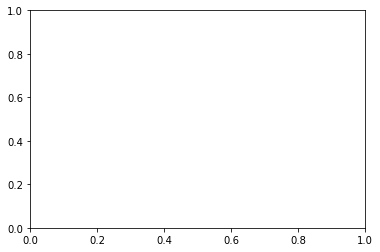

In [50]:
sns.boxplot(x='variable', y='value', data=time_measuring_melted)